In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def rl_decode(enc, shape=(1400, 875)):
    parts = [int(s) for s in enc.split(' ')]
    dec = list()
    for i in range(0, len(parts), 2):
        cnt = parts[i]
        val = parts[i+1]
        dec += cnt * [val]
    return np.array(dec, dtype=np.uint8).reshape(shape)

In [3]:
train_csv_path = 'data/train/vertical_flipped/train.csv'
train_path = 'data/train/vertical_flipped/'
data = pd.read_csv(train_csv_path)
data.head()

,Unnamed: 0,id,annotation
0,0,leaf01,104593 0 1 1 873 0 3 1 871 0 5 1 870 0 5 1 870...
1,1,leaf04,119262 0 1 1 873 0 3 1 871 0 5 1 870 0 5 1 870...
2,2,leaf05,55410 0 1 1 873 0 3 1 871 0 5 1 871 0 5 1 870 ...
3,3,leaf06,159652 0 1 1 873 0 3 1 871 0 5 1 870 0 5 1 869...
4,4,leaf07,45818 0 1 1 873 0 3 1 871 0 5 1 869 0 5 1 870 ...


In [4]:
# Decode every pair of data in the training set
def load_and_decode(train_csv, img_dir):
    train_data = pd.read_csv(train_csv)
    images, masks = [], []
    for idx, row in train_data.iterrows():
        img_path = f"{img_dir}/{row['id']}.jpg"
        img = Image.open(img_path)
        mask = rl_decode(row['annotation'])
        images.append(np.array(img))
        masks.append(mask)
    return images, masks

images, masks = load_and_decode(train_csv_path, train_path)


In [5]:
np.array(images).shape, np.array(masks).shape

((17, 1400, 875, 3), (17, 1400, 875))

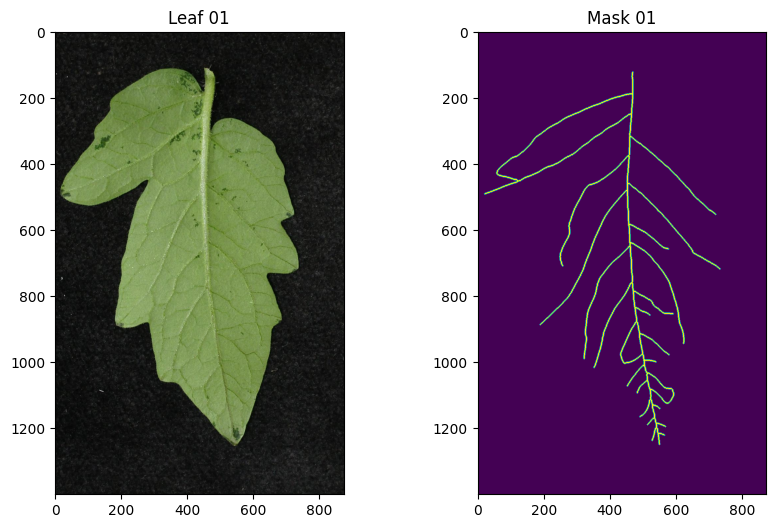

In [6]:
# Display the first image and mask
def display_image_and_mask(image, mask, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Leaf 01')

    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.title('Mask 01')

    plt.show()

display_image_and_mask(images[0], masks[0])


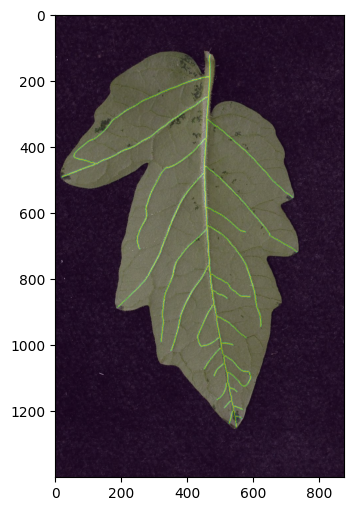

In [7]:
def display_image_with_mask(image, mask, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.3) 
    plt.show()

display_image_with_mask(images[0], masks[0])
